# Hypothesis: I think that students in the synchronous section will be more likely to recommend the class than the students in the remote section.

## First, I will ensure that all of the imported modules will autoreload in this Jupyter Notebook as they are updated.

In [1]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your modules!")

Autoreload of imported modules enabled. Be sure to save your modules!


## Now, I will read the CSV File and convert it to column-oriented data.

In [2]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows("../../data/survey.csv")
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select the columns for class section and likelihood of recommending the class. Here are the first 5 rows in a data table:

In [3]:
from data_utils import head, select
from tabulate import tabulate

select_data: dict[str, list[str]] = select(columns, ["section", "would_recommend"])
selected_select_data: dict[str, list[str]] = head(select_data, 5)

tabulate(selected_select_data, selected_select_data.keys(), "html")

section,would_recommend
In-Person,7
In-Person,7
Remote,7
,7
Remote,7


## Now, I need to extract the recommendation ratings from the Remote section.

In [4]:
from data_utils import remote_recommendation

remote_would_recommend: list[int] = remote_recommendation(select_data)
print(f"Values of recommendation from the remote section: {remote_would_recommend}")


Values of recommendation from the remote section: [7, 7, 4, 6, 4, 6, 5, 4, 4, 7, 2, 4, 7, 4, 2, 6, 6, 5, 2, 5, 5, 7, 5, 6, 7, 4, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 6, 5, 7, 7, 4, 7, 7, 5, 7, 6, 5, 6, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7, 7, 6, 5, 6, 1, 7, 7, 3, 3, 6, 4, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 3, 6, 6, 5, 4, 6, 1, 7, 6, 5, 6, 2, 4, 7, 2, 7, 5, 6, 4, 5, 7, 5, 5, 7, 7, 7, 3, 4, 4, 6, 4, 4, 3, 6, 3, 6, 7, 6, 7, 6, 7, 4, 5, 4, 5, 4, 6, 6, 6, 3, 7, 4, 6, 5, 6, 5, 4, 5, 7, 7, 4, 6, 7, 3, 5, 5, 4, 3, 7, 2, 2, 7, 7, 7, 5, 3, 5, 5, 5, 5, 2, 4, 4, 4, 6, 6, 7, 7, 3, 6, 5, 5, 4, 5, 4]


### Then, I will average all of the values given for the recommendation ratings.

In [5]:
from data_utils import average

average_remote: float = average(remote_would_recommend)
print(f"Average value: {average_remote}")

Average value: 5.494791666666667


## I now will find the responses from the In-Person section and their ratings of recommendation.

In [6]:
from data_utils import in_person_recommendation

in_person_would_recommend: list[int] = in_person_recommendation(select_data)
print(f"Values of recommendation from the in person section: {in_person_would_recommend}")


Values of recommendation from the in person section: [7, 7, 4, 5, 6, 6, 6, 7, 5, 1, 3, 7, 7, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 3, 5, 3, 4, 7, 7, 5, 7, 6, 2, 3, 5, 6, 6, 4, 5, 7, 7, 5, 5, 6, 5, 7, 6, 6, 7, 6, 4, 7, 4, 7, 4, 5, 3, 6, 5, 3, 3, 6, 2, 7, 3, 5, 7, 3, 7, 3, 6, 7, 4, 7, 7, 5, 5, 5, 6, 7, 5, 5, 3, 7, 7, 1, 5, 4, 4, 4, 7, 6, 6, 7, 7, 5, 7, 7, 5, 6, 6, 6, 6, 7, 7, 7, 7, 5, 5, 6, 7, 6, 6, 7, 7, 7, 7, 7, 2, 6, 7, 6, 7, 7, 6, 7, 7, 5, 6, 7, 7, 7, 6, 6, 4, 6, 6, 7, 5, 7, 7, 6, 6, 7, 5, 7, 7, 4, 7, 6, 5, 7, 7, 7, 5, 4, 6, 7, 4, 7, 6, 7, 7, 5, 6, 4, 7, 6, 1, 5, 6, 4, 4, 7, 5, 5, 4, 6, 4, 4, 6, 4, 6, 3, 6, 3, 5, 7, 7, 6, 6, 1, 6, 7, 7, 7, 6, 7, 6, 5, 5, 4, 4, 4, 6, 3, 4, 7, 6, 4, 6, 6, 4, 6, 4, 6, 4, 6, 6, 7, 7, 7, 6, 7, 6, 5, 5, 7, 6, 5, 7, 7, 7, 1, 7, 7, 7, 7, 6, 4, 7, 7, 4, 3, 4, 5, 4, 6, 7, 7, 4, 6, 4, 4, 3, 7, 6, 5, 6, 4, 3, 7, 7, 4, 6, 6, 4, 5, 4, 4, 3, 6, 6, 6, 6, 4, 6, 5, 1, 2, 5, 4, 1, 2, 4, 4, 1, 1, 1, 5, 4, 6, 3, 4, 5, 7, 7, 3, 5, 3, 6, 5, 2, 7, 6, 7, 4, 2, 7, 7, 7, 4, 7, 6, 5, 7

### Then, the averages for all of the values for likelihood of recommendation to a friend is found for the in-person section.

In [7]:
from data_utils import average

average_in_person: float = average(in_person_would_recommend)
print(f"Average value: {average_in_person}")

Average value: 5.451428571428571


## Now, I will put all of the data together.

In [8]:
from data_utils import count

section: list[str] = select_data["section"]
total_people: dict[str, int] = count(section)

print(f"The average value for likelihood of recommendation for the In-Person section is {average_in_person}, which was an avergae across {total_people['In-Person']} people.")
print(f"The average value for likelihood of recommendation for the Remote section is {average_remote}, which was an avergae across {total_people['Remote']} people.")


The average value for likelihood of recommendation for the In-Person section is 5.451428571428571, which was an avergae across 350 people.
The average value for likelihood of recommendation for the Remote section is 5.494791666666667, which was an avergae across 192 people.


# In Conclusion, I  will compare the averages for the two sections to see which has the higher average for likelihood of recommending to a friend, and then discuss moderating variables and the overall rating of the class.

## I hypothesized that the Remote section would rate the class less favorably than the In-Person section in terms of likelihood of recommendation. The survey showed that the average recommendation ratings for the two sections are relatively the same, with the Remote section having a bigger average by ~ 0.04. This could be because the students in the remote section enjoy that the computer-oriented nature of the class is computer-based. The similarity in the averages could be due to the fact that the average for the In-Person section had more survey responses to pull from (350 responses), as opposed to the 192 responses from the Remote section. The inequality in number of responses across both sections could have skewed the accuracy of the averages. Overall, the recommendation ratings for COMP110 were favorable, as the average was around 5.5 on a scale of 1-7 for both sections. The bar chart below shows the distribution of recommendation ratings across all survey responses, and proves that the average of 5.5 for both sections is reasonable when compared to the data set as a whole.

### The cell below shows the coding process to format the bar chart.

{'7': 197, '4': 88, '6': 134, '5': 92, '1': 12, '3': 34, '2': 16}


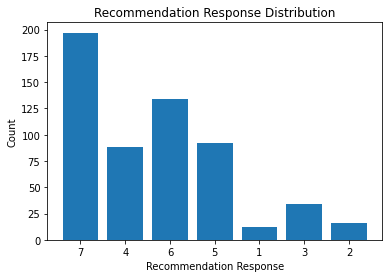

In [9]:
from matplotlib import pyplot as plt

total_numbers: dict[str, int] = count(select_data["would_recommend"])

plt.bar(total_numbers.keys(), total_numbers.values())
plt.title("Recommendation Response Distribution")
plt.xlabel("Recommendation Response")
plt.ylabel("Count")

print(total_numbers)